In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.chdir("/content/drive/My Drive/Colab Notebooks/ME 592X HWs")
os.getcwd()
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

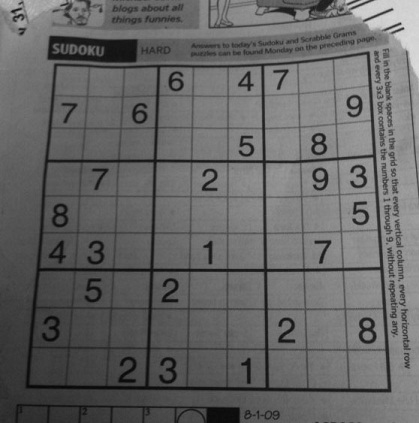

In [5]:
# read in image in grayscale 
img = cv2.imread("sudoku-original.png")
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(img_gray)

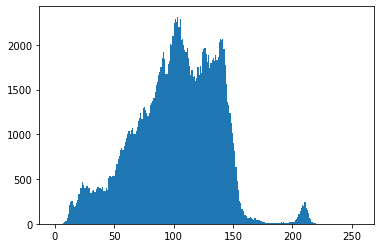

In [6]:
dst = plt.hist(img_gray.flatten(),256,[0,256])


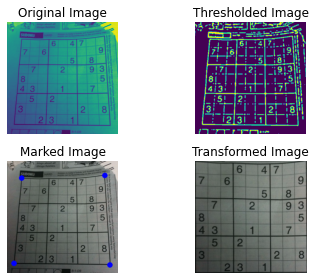

In [7]:
img_blur = cv2.medianBlur(img_gray,5)
image_result = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
image_result= cv2.medianBlur(image_result,5)

cnts = cv2.findContours(image_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

area=[]
for c in cnts:
    approx = cv2.approxPolyDP(c,0.08 * cv2.arcLength(c, True), True) 
    if(len(approx) == 4): 
        area.append(cv2.contourArea(c))
max_area=max(area)
img_copy=img.copy()

for c in cnts:
    approx = cv2.approxPolyDP(c,0.08 * cv2.arcLength(c, True), True) 
    if(cv2.contourArea(c)==max_area):
        coordinates=[x for l in approx.tolist() for x in l]
        for i in coordinates:
            x,y,w,h = cv2.boundingRect(c)
            centroid=(x+w/2,y+h/2)
            cv2.circle(img_copy, tuple(i), 5, (0,0,255), thickness=10, lineType=8, shift=0)

c_copy=np.array(coordinates,dtype='int')
left=c_copy[np.where(c_copy[:,0]<centroid[0])]
right=c_copy[np.where(c_copy[:,0]>centroid[0])]
top=c_copy[np.where(c_copy[:,1]>centroid[1])]
bottom=c_copy[np.where(c_copy[:,1]<centroid[1])]
left_bottom = [value for value in left if value in bottom] 
left_top = [value for value in left if value in top]
right_top = [value for value in right if value in top]
right_bottom = [value for value in right if value in bottom]
mapping=np.float32([[0,0],[299,0],[299,299],[0,299]])
original=np.float32([left_bottom,right_bottom,right_top,left_top])
matrix = cv2.getPerspectiveTransform(original, mapping) 
result = cv2.warpPerspective(img, matrix, (300, 300)) 
f, axes = plt.subplots(2,2)
axes[0,0].imshow(img_gray)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')
axes[0,1].imshow(image_result)
axes[0,1].set_title("Thresholded Image")
axes[0,1].axis('off')
axes[1,0].imshow(img_copy)
axes[1,0].set_title("Marked Image")
axes[1,0].axis('off')
axes[1,1].imshow(result)
axes[1,1].set_title("Transformed Image")
axes[1,1].axis('off')
plt.tight_layout()


## 2.2 Time series 

In [8]:
import pandas as pd 
import seaborn as sns
from datetime import datetime
import re

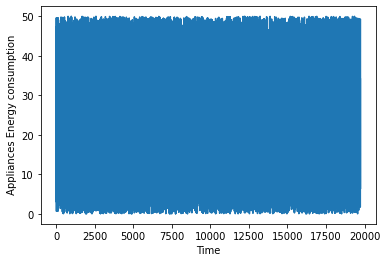

In [9]:
#  Plot the appliances energy consumption for the whole data
data = pd.read_csv("energydata_complete.csv")
plt.plot(data['Energy Consumption'])
plt.ylabel(" Appliances Energy consumption")
plt.xlabel("Time")
plt.show()


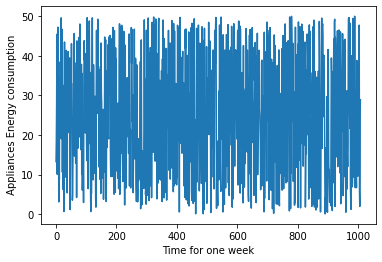

In [10]:
# Plot the appliances energy consumption with focus on week one
plt.plot(data['Energy Consumption'][0:(6*24*7)])
plt.ylabel(" Appliances Energy consumption")
plt.xlabel("Time for one week")
plt.show()

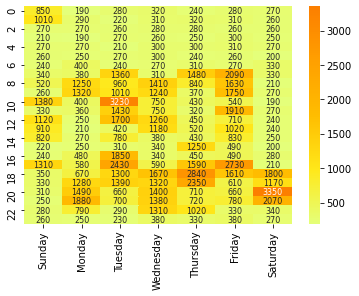

In [36]:
week_start=[]
for i in range(len(date)):
    if(re.search(' 0:00',date[i])):
        week_start.append(i)
week_no=1
start_index=week_start[week_no-1]
end_index=start_index+(7*24*6)

week = [x for x in range(0,7)]
hours = [x for x in range(0,24)]
app_week={}
for i in hours:
    app_week[i]={}
    for j in week:
        app_week[i][j]=0
k=start_index
for j in week:
    for i in hours:
        if(k<=end_index):
            app_week[i][j]+=np.sum(appliances[k:k+6])
            k+=6

heat_map = pd.DataFrame({
                       'Sunday': [app_week[x][0] for x in hours],
                       'Monday': [app_week[x][1] for x in hours],
                       'Tuesday': [app_week[x][2] for x in hours],
                       'Wednesday': [app_week[x][3] for x in hours],
                       'Thursday': [app_week[x][4] for x in hours],
                       'Friday': [app_week[x][5] for x in hours],
                       'Saturday': [app_week[x][6] for x in hours],})
sns.heatmap(heat_map, annot=True, fmt='g', annot_kws={"size": 8},cmap="Wistia")

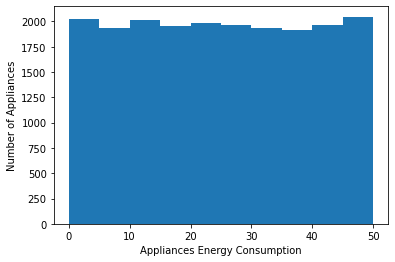

In [12]:
# Plot the histogram of energy consumption of appliances.
plt.hist(data['Energy Consumption'], bins=10)
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Number of Appliances')
plt.show()

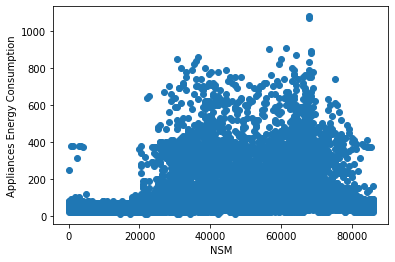

In [27]:
# 4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.
date = data["date"]
appliances=data["Appliances"]
nsm=[]
for i in range(len(date)):
    x=re.search(' [0-9]+:[0-9]+',date[i]).span()
    string=date[i][x[0]+1:x[1]]
    split=re.split(':',string)
    hrs=int(split[0])
    minutes=int(split[1])
    seconds=hrs*60*60+minutes*60
    nsm.append(seconds)

plt.scatter(nsm,appliances) 
plt.ylabel('Appliances Energy Consumption')
plt.xlabel('NSM')
plt.show()

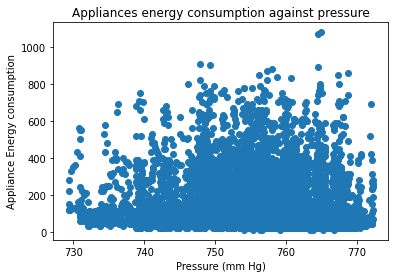

In [20]:
# 5. Plot appliances energy consumption vs. Press mm Hg.

plt.scatter(data['Press_mm_hg'],data['Appliances'])
plt.ylabel("Appliance Energy consumption")
plt.xlabel("Pressure (mm Hg)")
plt.title("Appliances energy consumption against pressure")
plt.show()

# 6. It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.


The plot for Appliances Energy consumption vs NSM shows that the energy usage in the first 20,000 seconds after midnight is low. The consumption increases significantly after this point which corresponds to about 6AM in the morning. This means that in the first 6 hours after midnight, people were sleeping and they were not using a lot of energy consuming appliances due to a general decrease in activity but as they begin to wake up, activity increases, more appliances were used and more energy is consumed.  The  plot also showed that with more pressure comes more appliances. 

## 2.3 Multi variate

In [29]:
# %%  Load the NASA dataset

data= pd.read_csv("airfoil_self_noise.dat", delim_whitespace=True, names=['Frequency','Angle of Attack',
                                                                        'Chord Length','Free-stream Velocity',
                                                                        'Suction Side Dispacement Thickness','Sound Pressure Level'], )

data=data[['Frequency','Angle of Attack','Chord Length','Free-stream Velocity','Suction Side Dispacement Thickness']]


In [33]:
# %% mean
mean=data.mean()
print('Mean:')
print(mean)

#%% variance 
var=data.var()
print('\nVariance:')
print(var)

# %% median
median=data.median()
print('\nMedian:')
print(median)

#%%  Kurtosis
kurtosis=data.kurtosis()
print('\nKurtosis:')
print(kurtosis)

#%%  Skew
skew=data.skew()
print('\nSkew:')
print(skew)

# %%Range
rng=data.max()-data.min()
print('\nRange:')
print(rng)

Mean:
Frequency                             2886.380572
Angle of Attack                          6.782302
Chord Length                             0.136548
Free-stream Velocity                    50.860745
Suction Side Dispacement Thickness       0.011140
dtype: float64

Variance:
Frequency                             9.938717e+06
Angle of Attack                       3.502424e+01
Chord Length                          8.749868e-03
Free-stream Velocity                  2.425116e+02
Suction Side Dispacement Thickness    1.729287e-04
dtype: float64

Median:
Frequency                             1600.000000
Angle of Attack                          5.400000
Chord Length                             0.101600
Free-stream Velocity                    39.600000
Suction Side Dispacement Thickness       0.004957
dtype: float64

Kurtosis:
Frequency                             5.708685
Angle of Attack                      -0.412951
Chord Length                         -1.037964
Free-stream Velocity  